In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("Product_Reviews.csv")

In [ ]:
df.head()

,Product ID,Product Review,Sentiment
0,AVpe7AsMilAPnD_xQ78G,I initially had trouble deciding between the p...,POSITIVE
1,AVpe7AsMilAPnD_xQ78G,Allow me to preface this with a little history...,POSITIVE
2,AVpe7AsMilAPnD_xQ78G,I am enjoying it so far. Great for reading. Ha...,POSITIVE
3,AVpe7AsMilAPnD_xQ78G,I bought one of the first Paperwhites and have...,POSITIVE
4,AVpe7AsMilAPnD_xQ78G,I have to say upfront - I don't like coroporat...,POSITIVE


In [ ]:
def lower_case(text):
    return text.lower()

In [ ]:
df['Product Review']=df['Product Review'].apply(lower_case)

In [ ]:
df.head()

,Product ID,Product Review,Sentiment
0,AVpe7AsMilAPnD_xQ78G,i initially had trouble deciding between the p...,POSITIVE
1,AVpe7AsMilAPnD_xQ78G,allow me to preface this with a little history...,POSITIVE
2,AVpe7AsMilAPnD_xQ78G,i am enjoying it so far. great for reading. ha...,POSITIVE
3,AVpe7AsMilAPnD_xQ78G,i bought one of the first paperwhites and have...,POSITIVE
4,AVpe7AsMilAPnD_xQ78G,i have to say upfront - i don't like coroporat...,POSITIVE


In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def remove_stopwords(text):
  words=text.split()
  stop_words=stopwords.words('english')
  filtered_word=[]
  for i in words:
    if i not in stop_words:
      filtered_word.append(i)
  return ' '.join(filtered_word)


In [ ]:
df['Review_without_stopwords']=df['Product Review'].apply(remove_stopwords)

In [ ]:
df.head()

,Product ID,Product Review,Sentiment,Review_without_stopwords
0,AVpe7AsMilAPnD_xQ78G,i initially had trouble deciding between the p...,POSITIVE,initially trouble deciding paperwhite voyage r...
1,AVpe7AsMilAPnD_xQ78G,allow me to preface this with a little history...,POSITIVE,allow preface little history. (was) casual rea...
2,AVpe7AsMilAPnD_xQ78G,i am enjoying it so far. great for reading. ha...,POSITIVE,enjoying far. great reading. original fire sin...
3,AVpe7AsMilAPnD_xQ78G,i bought one of the first paperwhites and have...,POSITIVE,bought one first paperwhites pleased constant ...
4,AVpe7AsMilAPnD_xQ78G,i have to say upfront - i don't like coroporat...,POSITIVE,"say upfront - like coroporate, hermetically cl..."


In [ ]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [ ]:
def apply_stemming(text):
  words = text.split()
  stemmed_words = []
  for word in words:
    stemmed_words.append(stemming.stem(word))
  return " ".join(stemmed_words)

In [ ]:
print(apply_stemming("hi eating lunch"))

hi eat lunch


In [ ]:
df['Stemmed Review']=df['Review_without_stopwords'].apply(apply_stemming)

In [ ]:
df.head()

,Product ID,Product Review,Sentiment,Review_without_stopwords,Stemmed Review
0,AVpe7AsMilAPnD_xQ78G,i initially had trouble deciding between the p...,POSITIVE,initially trouble deciding paperwhite voyage r...,initi troubl decid paperwhit voyag review less...
1,AVpe7AsMilAPnD_xQ78G,allow me to preface this with a little history...,POSITIVE,allow preface little history. (was) casual rea...,allow prefac littl history. (was) casual reade...
2,AVpe7AsMilAPnD_xQ78G,i am enjoying it so far. great for reading. ha...,POSITIVE,enjoying far. great reading. original fire sin...,enjoy far. great reading. origin fire sinc 201...
3,AVpe7AsMilAPnD_xQ78G,i bought one of the first paperwhites and have...,POSITIVE,bought one first paperwhites pleased constant ...,bought one first paperwhit pleas constant comp...
4,AVpe7AsMilAPnD_xQ78G,i have to say upfront - i don't like coroporat...,POSITIVE,"say upfront - like coroporate, hermetically cl...","say upfront - like coroporate, hermet close st..."


In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag, word_tokenize

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN



In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')  # NEW name in recent NLTK versions
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
def apply_lemmatization(sentence):
  tokens = word_tokenize(sentence)
  pos_tags = pos_tag(tokens)

  lemmatizer = WordNetLemmatizer()
  lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]
  return " ".join(lemmatized_words)

In [ ]:
df['lemmatized_review']=df['Review_without_stopwords'].apply(apply_lemmatization)

In [ ]:
df.head()

,Product ID,Product Review,Sentiment,Review_without_stopwords,Stemmed Review,lemmatized_review
0,AVpe7AsMilAPnD_xQ78G,i initially had trouble deciding between the p...,POSITIVE,initially trouble deciding paperwhite voyage r...,initi troubl decid paperwhit voyag review less...,initially trouble decide paperwhite voyage rev...
1,AVpe7AsMilAPnD_xQ78G,allow me to preface this with a little history...,POSITIVE,allow preface little history. (was) casual rea...,allow prefac littl history. (was) casual reade...,allow preface little history . ( be ) casual r...
2,AVpe7AsMilAPnD_xQ78G,i am enjoying it so far. great for reading. ha...,POSITIVE,enjoying far. great reading. original fire sin...,enjoy far. great reading. origin fire sinc 201...,enjoy far . great reading . original fire sinc...
3,AVpe7AsMilAPnD_xQ78G,i bought one of the first paperwhites and have...,POSITIVE,bought one first paperwhites pleased constant ...,bought one first paperwhit pleas constant comp...,buy one first paperwhites pleased constant com...
4,AVpe7AsMilAPnD_xQ78G,i have to say upfront - i don't like coroporat...,POSITIVE,"say upfront - like coroporate, hermetically cl...","say upfront - like coroporate, hermet close st...","say upfront - like coroporate , hermetically c..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_stem = TfidfVectorizer()
vectorizer_lemma = TfidfVectorizer()

In [ ]:
X_stem = vectorizer_stem.fit_transform(df['Stemmed Review'])
X_lemma = vectorizer_lemma.fit_transform(df['lemmatized_review'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv_stem = CountVectorizer()
cv_lemma = CountVectorizer()
X_count_stem = cv_stem.fit_transform(df['Stemmed Review'])
X_count_lemma = cv_lemma.fit_transform(df['lemmatized_review'])


In [ ]:
y=df['Sentiment']

##Using LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X_lemma, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
f1_lemma_tfidf = f1_score(y_test, y_pred, average='weighted')




In [ ]:
print(f1_lemma_tfidf)

0.8434007400740074


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_stem, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
f1_stem_tfidf = f1_score(y_test, y_pred, average='weighted')

In [ ]:
print(f1_stem_tfidf)

0.8434007400740074


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_count_lemma, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
f1_count_lemma = f1_score(y_test, y_pred, average='weighted')

In [ ]:
print(f1_count_lemma)

0.8514425636111999


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_count_stem, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
f1_count_stem = f1_score(y_test, y_pred, average='weighted')

In [ ]:
print(f1_count_stem)

0.8423754176659902


##Output using LogisticRegression

In [ ]:
print("Lemmatized and tfidf:",f1_lemma_tfidf)
print("Stemming and tfidf:  ",f1_stem_tfidf)
print("Lemmatized and BOW:  ",f1_count_lemma)
print("Stemming and BOW:    ",f1_count_stem)

Lemmatized and tfidf: 0.8434007400740074
Stemming and tfidf:   0.8434007400740074
Lemmatized and BOW:   0.8514425636111999
Stemming and BOW:     0.8423754176659902


##Using Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

def evaluate_nb(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    nb = MultinomialNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    return f1_score(y_test, y_pred, average='weighted')

# TF-IDF
f1_nb_tfidf_lemma = evaluate_nb(X_lemma, y)
f1_nb_tfidf_stem  = evaluate_nb(X_stem, y)

# CountVectorizer
f1_nb_count_lemma = evaluate_nb(X_count_lemma, y)
f1_nb_count_stem  = evaluate_nb(X_count_stem, y)

print("Naive Bayes - Lemmatized + TF-IDF:", f1_nb_tfidf_lemma)
print("Naive Bayes - Stemmed + TF-IDF   :", f1_nb_tfidf_stem)
print("Naive Bayes - Lemmatized + BOW   :", f1_nb_count_lemma)
print("Naive Bayes - Stemmed + BOW      :", f1_nb_count_stem)


Naive Bayes - Lemmatized + TF-IDF: 0.8113573262088114
Naive Bayes - Stemmed + TF-IDF   : 0.8113573262088114
Naive Bayes - Lemmatized + BOW   : 0.8490626899381348
Naive Bayes - Stemmed + BOW      : 0.854936196195732


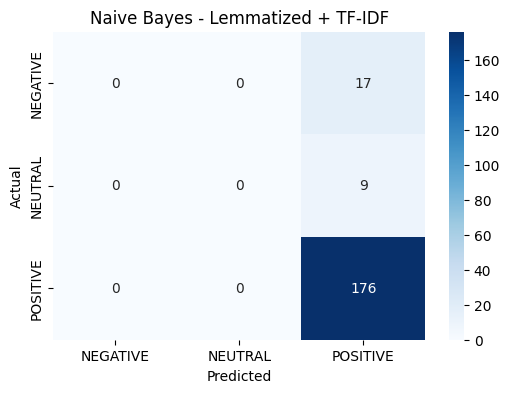

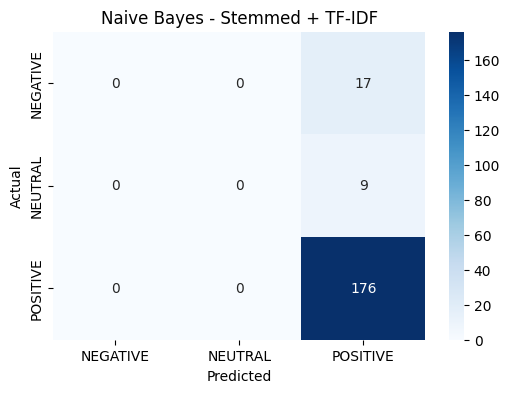

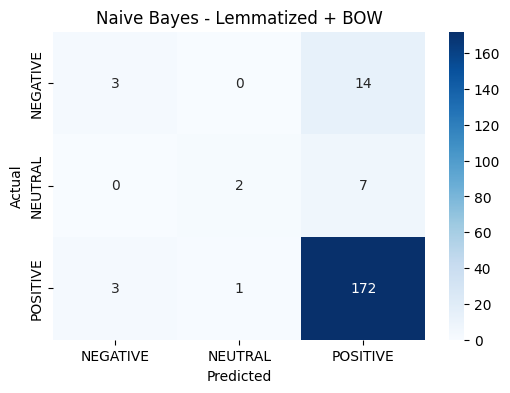

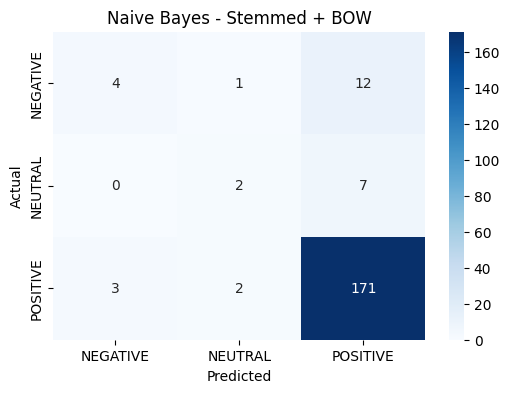

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(X, y, title):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    nb = MultinomialNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb.classes_, yticklabels=nb.classes_)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for each Naive Bayes model
plot_confusion_matrix(X_lemma, y, "Naive Bayes - Lemmatized + TF-IDF")
plot_confusion_matrix(X_stem, y, "Naive Bayes - Stemmed + TF-IDF")
plot_confusion_matrix(X_count_lemma, y, "Naive Bayes - Lemmatized + BOW")
plot_confusion_matrix(X_count_stem, y, "Naive Bayes - Stemmed + BOW")

In [ ]:
from sklearn.metrics import accuracy_score

def evaluate_accuracy(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Logistic Regression
lr_lemma_tfidf = evaluate_accuracy(X_lemma, y, LogisticRegression(max_iter=1000))
lr_stem_tfidf = evaluate_accuracy(X_stem, y, LogisticRegression(max_iter=1000))
lr_count_lemma = evaluate_accuracy(X_count_lemma, y, LogisticRegression(max_iter=1000))
lr_count_stem = evaluate_accuracy(X_count_stem, y, LogisticRegression(max_iter=1000))

print("Logistic Regression - Lemmatized + TF-IDF:", lr_lemma_tfidf)
print("Logistic Regression - Stemmed + TF-IDF   :", lr_stem_tfidf)
print("Logistic Regression - Lemmatized + BOW   :", lr_count_lemma)
print("Logistic Regression - Stemmed + BOW      :", lr_count_stem)

print("\n")

# Naive Bayes
nb_lemma_tfidf = evaluate_accuracy(X_lemma, y, MultinomialNB())
nb_stem_tfidf = evaluate_accuracy(X_stem, y, MultinomialNB())
nb_count_lemma = evaluate_accuracy(X_count_lemma, y, MultinomialNB())
nb_count_stem = evaluate_accuracy(X_count_stem, y, MultinomialNB())

print("Naive Bayes - Lemmatized + TF-IDF:", nb_lemma_tfidf)
print("Naive Bayes - Stemmed + TF-IDF   :", nb_stem_tfidf)
print("Naive Bayes - Lemmatized + BOW   :", nb_count_lemma)
print("Naive Bayes - Stemmed + BOW      :", nb_count_stem)

Logistic Regression - Lemmatized + TF-IDF: 0.8861386138613861
Logistic Regression - Stemmed + TF-IDF   : 0.8861386138613861
Logistic Regression - Lemmatized + BOW   : 0.8861386138613861
Logistic Regression - Stemmed + BOW      : 0.8712871287128713


Naive Bayes - Lemmatized + TF-IDF: 0.8712871287128713
Naive Bayes - Stemmed + TF-IDF   : 0.8712871287128713
Naive Bayes - Lemmatized + BOW   : 0.8762376237623762
Naive Bayes - Stemmed + BOW      : 0.8762376237623762
